In [1]:
import warnings                       # 경고 메시지를 출력하고 싶지 않을 경우 
warnings.filterwarnings('ignore')     # 경고 메시지를 무시한다. 경고 메시지를 보고 싶다면 default로 지정
from IPython.display import Image     # jupyter notebook에 이미지를 출력
import numpy as np                    # 배열(수치) 계산
import pandas as pd                   # 데이터 분석 
import matplotlib.pyplot as plt       # 데이터 시각화  
plt.rcParams['font.family'] = 'NanumGothic' # matplotlib에서 사용할 한글 글꼴 지정
plt.rcParams['font.size'] = 15              # matplotlib에서 사용할 글꼴의 크기 지정
import matplotlib as mpl                    # matplotlib에서 음수 데이터의 '-' 글꼴이 깨지는 것 방지
mpl.rcParams['axes.unicode_minus'] = False  # matplotlib에서 음수 데이터의 '-' 글꼴이 꺠지지 않게 한다.
import seaborn as sns                 # matplotlib를 기반으로 한 데이터 시각화 도구
from plotnine import *                # R의 ggplot2 패키지를 사용하는 것처럼 시각화하는 도구를 import한다.
import missingno as msno              # NaN 분포를 그래프 형태로 시각화하는 도구를 import 한다.
import folium                         # 지도 시각화 도구를 import 한다.

서울시 공무원 업무 추진비를 분석한 공무원 맛집 찾기  
서울시는 업무 추진에 대한 비용 집행의 투명성을 제공하고자 공개된 시장단을 비롯해 4급 부서장 이상의 간부직 공무원의 업무 추진비 집행 내역을 공개한다.  
서울시 업무 추진비 url => https://opengov.seoul.go.kr/expense

In [2]:
# read_csv() 함수에 index_col 옵션을 사용하면 인덱스에도 열 이름을 붙일 수 있다.
df = pd.read_csv('./data/raw.csv', index_col='연번')
df.shape

(51456, 9)

In [3]:
df.tail()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
42,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)
43,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04,스타벅스 (중구 을지로 19)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51456 entries, 1 to 43
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   집행금액    51455 non-null  float64
 6   집행목적    51440 non-null  object 
 7   집행일시    51455 non-null  object 
 8   집행장소    51421 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


<AxesSubplot:>

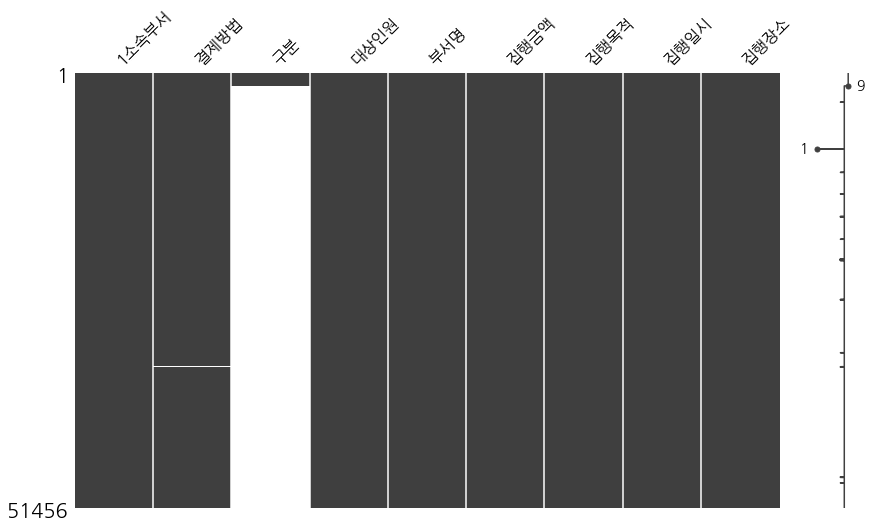

In [5]:
msno.matrix(df, figsize=(14, 8))

In [6]:
# 집행금액에 NaN 데이터가 있는지 확인하기
df[df['집행금액'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
missing_df_row = df[df['집행금액'].isnull()].index[0]
missing_df_row

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [8]:
# 해당 행을 제거하고 다시 df 데이터프레임에 저장한다.
print(df.shape)
# df = df.drop(missing_df_row)
print(df.shape)

(51456, 9)
(51456, 9)


In [9]:
# 집행일시 열을 이용해서 '연', '월', '연월', '일', '시', '분', '요일' 파생 변수를 만든다.
# 판다스에서 to_datetime() 함수를 사용해서 문자열 형태의 데이터를 날짜/시간 형태의 데이터로 변환할 수 있다.
df['집행일시'] = pd.to_datetime(df['집행일시'])
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
dtype: object

In [10]:
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day.astype(int)
df['시'] = df['집행일시'].dt.hour.astype(int)
df['분'] = df['집행일시'].dt.minute.astype(int)
df['요일'] = df['집행일시'].dt.dayofweek.astype(int) # 0 : 월, 1: 화, 2: 수, 3: 목, 4: 금, 5:토. 6: 일


df.dtypes

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=10)
sns.countplot(data=df, x='월')

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=10)
plt.xticks(rotation = 45)
sns.countplot(data=df, x='연월')

In [ ]:
# 그래프에서 '연월' 순으로 보기 위해서 '연', '월'의 오름차순으로 정렬한다.
df = df.sort_values(by=['연', '월'])

ValueError: Could not interpret input '연월'

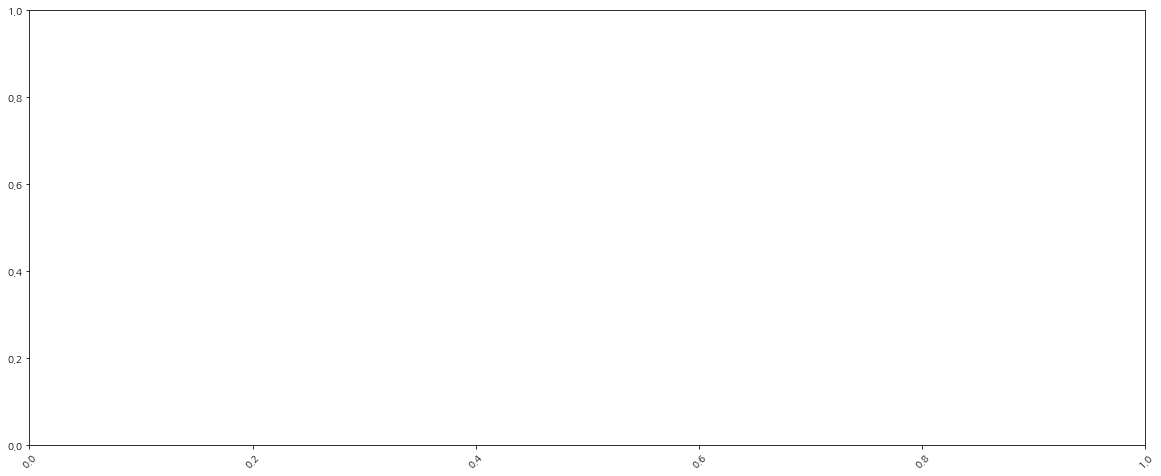

In [11]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=10)
plt.xticks(rotation = 45)
sns.countplot(data=df, x='연월')

In [14]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=10)
sns.countplot(data=df, x='요일')

ValueError: Could not interpret input '요일'

In [13]:
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['요일_한글'] = df['요일'].apply(lambda x: weekday_map[x])
df

KeyError: '요일'

In [15]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=10)
sns.countplot(data=df.sort_values(by=['요일']), x='요일_한글')

KeyError: '요일'

In [16]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('font', size=10)
sns.boxplot(data=df, x='요일_한글', y='집행금액')

ValueError: Could not interpret input '요일_한글'

집행 목적 워드클라우드

In [18]:
from wordcloud import WordCloud

In [20]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110)


In [22]:
# 집행목적이 NaN인 데이터 확인
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
112,대변인,카드,NaN,행정팀장 등 4명,대변인 언론담당관,75000.0,NaN,2017-09-28 19:07:00,남산집 (중구 무교동)
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,30000.0,NaN,2017-02-01 12:03:00,복성각 (서울 중구 덕수궁길 7)
2,여성가족정책실,카드,NaN,가족정책팀장외 3명,여성가족정책실 가족담당관,21500.0,NaN,2017-02-01 15:30:00,마포만두 (서울 중구 남대문로9길 51)
3,여성가족정책실,카드,NaN,가족담당관외 5명,여성가족정책실 가족담당관,56500.0,NaN,2017-02-10 09:48:00,파스쿠찌종각알파빌딩 (서울 종로구 종로)
4,여성가족정책실,카드,NaN,가족담당관외 6명,여성가족정책실 가족담당관,8000.0,NaN,2017-02-10 09:54:00,파리바게뜨 종로시그 (서울 종로구 종로)
5,여성가족정책실,카드,NaN,가족담당관외 8명,여성가족정책실 가족담당관,117000.0,NaN,2017-02-10 12:14:00,（주）뚜리삼 (서울 중구 무교동)
6,여성가족정책실,카드,NaN,출산장려팀장외 4명,여성가족정책실 가족담당관,87500.0,NaN,2017-02-14 12:55:00,동성각 (서울 종로구 새문안로9길 29-2)
7,여성가족정책실,카드,NaN,가족담당관외 20명,여성가족정책실 가족담당관,62000.0,NaN,2017-02-21 19:37:00,갯마을낙지 (서울 중구 을지로1길 32)


In [26]:
# 집행목적이 NaN인 데이터는 공백으로 채워준다.
df['집행목적'] = df['집행목적'].fillna(' ')
df[df['집행목적'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,


In [28]:
# 파이썬 문자열 메소드 중 특정 문자열을 문자열 사이에 삽입하는 join() 함수를 사용해서 집행목적을 연결해 워드 클라우드를 실행한다.
spend_gubun = ' '.join(df['집행목적'])
spend_gubun

'시정 정책추진 자문 간담회 시정 청년 정책 의견수렴 간담회 시정 주요 경제정책 현안추진 의견수렴 간담회 시정종교계 의견수렴 간담회 시정 정책 추진 의견수렴 간담회 시정 정책 추진 의견청취 간담회 남북교류정책 현안관련 조찬 간담회 시정 남북교류협력관련 자문회의 시정 정책 설명 및 자문 간담회 시정 정책 설명 및 의견수렴 언론 간담회 시정 정책현안 의견수렴 간담회 시정 정책 정부협력 간담회 시정 정책 추진 협의 간담회 시정정책 추진관련 종교계 의견 수렴 간담회 시정 정책추진 자문 간담회 시정 정책추진 의견수렴 간담회 시정 정책추진 및 의견수렴 및 자문 간담회 시정 정책추진 의견수렴 간담회 시정 정책 추진 자문 간담회 시정 정책 추진관련 자문 간담회 서울 정책연구 개발추진 자문 간담회 시정 정책추진 의견수렴 간담회 시정 정책 언론협력 기자 간담회 시정 정책 추진 자문 간담회 시정 주요행사 일정점검 검토회의 시정 지역 현안정책 의견수렴 및 자문 간담회 시정 정책 지역현안 자문 간담회 시정 정책현안 검토 간담회 시정 정책현안 자문 간담회 시정 노동정책 관련 의견수렴 및 자문 간담회 법치시정 확립 추진 노고직원 격려 평창 동계올림픽 현장방문 간담회 시정정책 및 시장단 현안관련 업무협의 간담회 비서실 현안업무 추진 노고 직원 격려 시장실 직원 격려 간담회 신년맞이 관계관 격려 간담회 신년맞이 주요업무 추진 직원격려 결혼축하품 구입 주차계획과 직원 격려 가족담당관 직원 격려 교통정책과, 버스정책과 직원 격려 교통정책과,버스정책과, 관광정책과 직원 격려 노동정책과 직원 격려 체육정책과 직원 격려 청사 방호직원 격려 간담회 시정 정책 추진 및 정무 관련 업무협의 신년인사 및 시정현안 관련 업무협의 간담회 실시 현안업무 추진 부시장단 격려 시정 정책 국제관계협력 직원격려 간담회 월계동 난방사고 현장직원 격려 중부수도사업소 직원 격려 직원 사망 유족 위로금 평창동계올림픽 관련 국빈 방문관련 노고직원 격려 시정 일자리 지원정책 자문 간담회 남부수도사업소 직원 격려 미세먼저 저감대책

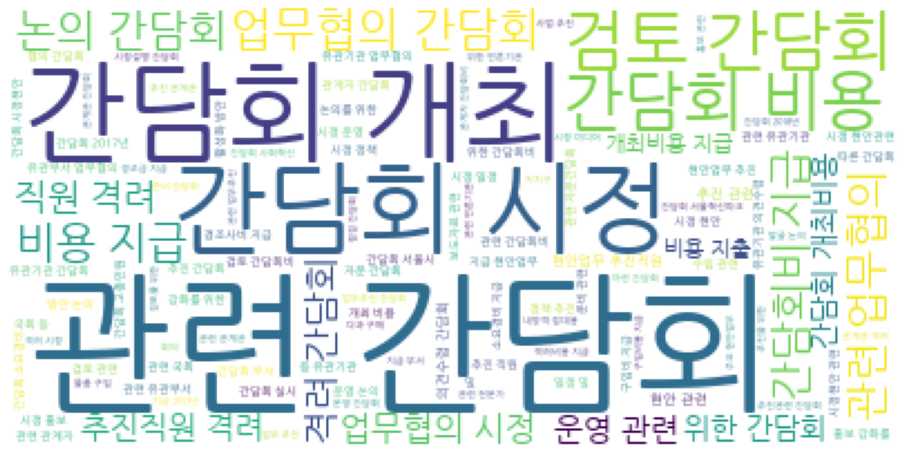

In [35]:
wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\NanumGothic.ttf',
    background_color = 'white',
    relative_scaling = 0.5,
).generate(spend_gubun)
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
# 집행 장소가 NaN인 데이터를 공백으로 채워준다.
df['집행장소'] = df['집행장소'].fillna(' ')
df[df['집행장소'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,


In [40]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110)


In [42]:
# 집행장소에 보이는 주소는 전처리를 통해 제거하고 '상호명'이라는 열을 만들어 집행장소에서 상호명을 가져온다.
# 괄호 앞에 있는 것을 상호명으로 한다.
df['상호명'] = df['집행장소'].apply(lambda x: x.split('(')[0].strip())
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,상호명
연번,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),동신참치양재직
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),서울시청구내식당
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),한뫼촌
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),서울시청구내식당
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),서울시청구내식당


In [45]:
# 상호명이 공백인 데이터의 집행목적을 확인한다.
df.loc[df['상호명'] == '', '집행목적'].value_counts()

현안업무 추진직원 격려 간담회 개최비용 지급      7
상수도사업본부직원경조사비 지급              4
도시기반시설본부직원 경조사비 지급            3
부서운영을 위한 원두커피 구입비 지급          3
주택건축국직원경조사비 지급                2
                             ..
2018년 문화정책 수립 간담회             1
시정주요사업 추진실적 검토 관련 업무협의 간담회    1
대기정책과 부서 격려 및 소통회 비용 지출       1
비서실 운영 관련 간담회                 1
압구정아파트지구 개발기본계획 검토간담회         1
Name: 집행목적, Length: 269, dtype: int64

In [48]:
# 상호명이 '대상자 소속부서'인 데이터의 집행목적을 확인한다.
df.loc[df['상호명'] == '대상자 소속부서', '집행목적'].value_counts()

경조금 지급        126
경조금 지급 2건      14
경조금 지급 3건      11
경조금 2건          9
경조금 지급 5건       6
경조금 1건          5
경조금 지급 4건       5
경조금 4건          3
경조금 지급 9건       3
경조금 지급 7건       2
경조금 6건          2
경조금 지급 8건       2
경조금 지급 1건       2
경조금 지급 6건       2
경조금 3건          1
경조금 5건          1
경조금 지급 12건      1
경조금 지급 5명       1
경조금 지급(5명)      1
경조금 지급(3명)      1
경조사비 지급         1
Name: 집행목적, dtype: int64

In [50]:
# 상호명이 공백, '대상자 소속부서', '-'인 데이터(잘못된 데이터)를 제거한다.
df_shop = df[(df['상호명'] != '') & (df['상호명'] != '대상자 소속부서') & (df['상호명'] != '-')]
df_shop

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,상호명
연번,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),동신참치양재직
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),서울시청구내식당
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),한뫼촌
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),서울시청구내식당
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),서울시청구내식당
...,...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),올리브네트웍스
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),남도한식고운님
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),춘산에프앤비


In [57]:
df_shop['상호명'].value_counts().head(30)

참숯골           773
우도일식          729
서울시청매점        700
구이구이          647
곰국시집          494
서울시청구내식당      409
동해일식          399
무교소호정         362
동해수산          331
바닷가작은부엌       319
스타벅스          319
라칸티나          309
한가람           308
동원참치          304
더테이블한정식       295
삼우정           278
어미가           276
제일가든          274
파리바게뜨         259
오리마당          259
월향            256
복성각           256
열빈            230
무교동낙지         229
남포면옥          223
（주）바닷가작은부엌    217
서라벌           205
포메인           205
마마스           202
금강산           195
Name: 상호명, dtype: int64

In [59]:
df_shop.loc[df_shop['상호명'] == '（주）바닷가작은부엌', '상호명'] = '바닷가작은부엌'
df_shop['상호명'].value_counts().head(30)

참숯골         773
우도일식        729
서울시청매점      700
구이구이        647
바닷가작은부엌     536
곰국시집        494
서울시청구내식당    409
동해일식        399
무교소호정       362
동해수산        331
스타벅스        319
라칸티나        309
한가람         308
동원참치        304
더테이블한정식     295
삼우정         278
어미가         276
제일가든        274
오리마당        259
파리바게뜨       259
복성각         256
월향          256
열빈          230
무교동낙지       229
남포면옥        223
포메인         205
서라벌         205
마마스         202
금강산         195
오복미역        194
Name: 상호명, dtype: int64

In [64]:
top_100 = df_shop['상호명'].value_counts().head(100)
top_100 = pd.DataFrame(top_100).reset_index()
top_100.columns = ['상호명', '방문횟수']
top_100

,상호명,방문횟수
0,참숯골,773
1,우도일식,729
2,서울시청매점,700
3,구이구이,647
4,바닷가작은부엌,536
...,...,...
95,프레스클럽,84
96,장안삼계탕,84
97,이북만두,83
98,고려삼계탕,83


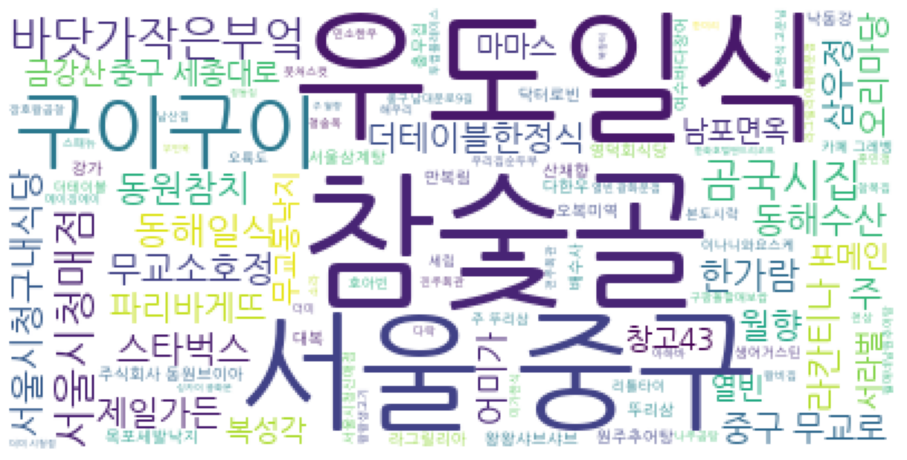

In [65]:
wordcloud = WordCloud(
    font_path = 'C:\\Windows\\Fonts\\NanumGothic.ttf',
    background_color = 'white',
    relative_scaling = 0.5,
).generate(' '.join(df_shop['상호명']))
plt.figure(figsize=(16, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()